In [1]:
#@title Download Data

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1KJHCkgVGvIwA4599rAdy8Zlf_3njkusA' -O full_dataset.csv

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1TdoIwEWGd9tj0A4SsbezdWFBOJoxrgfD' -O holidays.csv

--2021-03-04 15:08:25--  https://drive.google.com/uc?export=download&id=1KJHCkgVGvIwA4599rAdy8Zlf_3njkusA
Resolving drive.google.com (drive.google.com)... 173.194.212.102, 173.194.212.101, 173.194.212.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.212.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3q18cooep7q93klhlvhrunvffvbr9mfc/1614870450000/05682749337820281666/*/1KJHCkgVGvIwA4599rAdy8Zlf_3njkusA?e=download [following]
--2021-03-04 15:08:26--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3q18cooep7q93klhlvhrunvffvbr9mfc/1614870450000/05682749337820281666/*/1KJHCkgVGvIwA4599rAdy8Zlf_3njkusA?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to doc-14-4c-docs.googleusercontent.com (d

In [21]:
#@title Load Data

import pandas as pd

def load_full_dataset(path):
    """
    given a dataset with all business units
    return and write to each csv
    """
    df = pd.read_csv(path)
    
    df.rename(columns={'ACTIVITY DATE':'date', 
                       'Sum of TOTAL TIME - AHT (sec)':'handle_time', 
                       'Sum of TOTAL TIME - AHT - FORECAST (sec)': 'handle_time_forecast', 
                       'Sum of VOLUME - RECEIVED': 'volume', 
                       'Sum of VOLUME - FORECAST': 'volume_forecast', 
                       'Sum of VOLUME - HANDLED': 'volume_handled'}, inplace=True)
    
    df.columns = [x.lower() for x in df.columns]
    
    return df

path = '../content/full_dataset.csv'
df = load_full_dataset(path)
df.tail()

def write_data(df, group='business line', 
forecast_list=['handle_time','handle_time_forecast', 
'volume', 'volume_forecast', 'volume_handled']):
    """
    take in a dataframe, query by business unit 
    and write to a csv
    """
    # iterate through the unique business lines
    groups = df[group].unique()
    for line in groups:
        data = df[df[group] == line][['date']+forecast_list]

        path = '../content/'+line+'_aht_vol.csv'
        path = path.replace(' ', '-')
        data.to_csv(path)
        print('wrote to '+path)

write_data(df)


wrote to ../content/WISE-Contractual_aht_vol.csv
wrote to ../content/CS-Alaska_aht_vol.csv
wrote to ../content/CS-John-Hancock_aht_vol.csv
wrote to ../content/CS-Maryland_aht_vol.csv
wrote to ../content/CS-National_aht_vol.csv
wrote to ../content/RIS_aht_vol.csv
wrote to ../content/RCS-PHONES_aht_vol.csv
wrote to ../content/BRO_aht_vol.csv
wrote to ../content/PSG_aht_vol.csv
wrote to ../content/BRO-Complex_aht_vol.csv


In [59]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

def remove_holidays(df, path='../content/holidays.csv'):
    """
    take in a holidays csv of dates and return
    a filtered dataframe
    """
    
    holidays = pd.read_csv(path)
    
    if 'ds' not in df.columns:
        date_marker = 'date'
    else:
        date_marker = 'ds'
    
    return df[(~df[date_marker].dt.weekday.isin([5,6])) & (~df[date_marker].isin(holidays.iloc[:,0].tolist()))]

df = pd.read_csv("../content/RIS_aht_vol.csv", index_col=0, parse_dates=['date'])
df['aht'] = df['handle_time'] / df['volume_handled']
df['aht_forecast'] = df['handle_time_forecast'] / df['volume_forecast']
df.reset_index(drop=True, inplace=True)
# df = remove_holidays(df)
df.head()


,date,handle_time,handle_time_forecast,volume,volume_forecast,volume_handled,aht,aht_forecast
0,2016-01-01,2006.0,NaN,6.0,0.0,6.0,334.333333,NaN
1,2016-01-02,728895.0,NaN,1174.0,921.0,1167.0,624.588689,NaN
2,2016-01-03,0.0,NaN,0.0,0.0,0.0,NaN,NaN
3,2016-01-04,3996279.0,NaN,6886.0,6547.0,6046.0,660.978994,NaN
4,2016-01-05,3175414.0,NaN,4928.0,4328.0,4715.0,673.470626,NaN


In [60]:
df = df.set_index('date')

In [61]:
volume = df.loc[:,'volume']
handle_time = df.loc[:,'handle_time']
aht = df.loc[:,'aht']

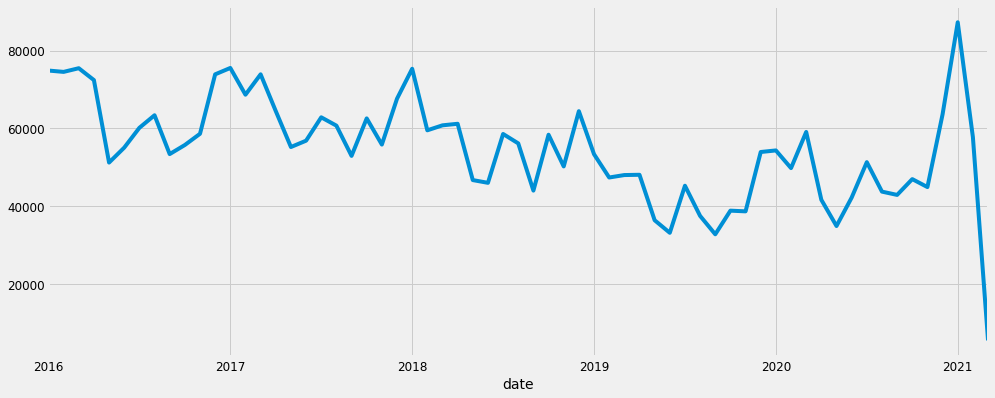

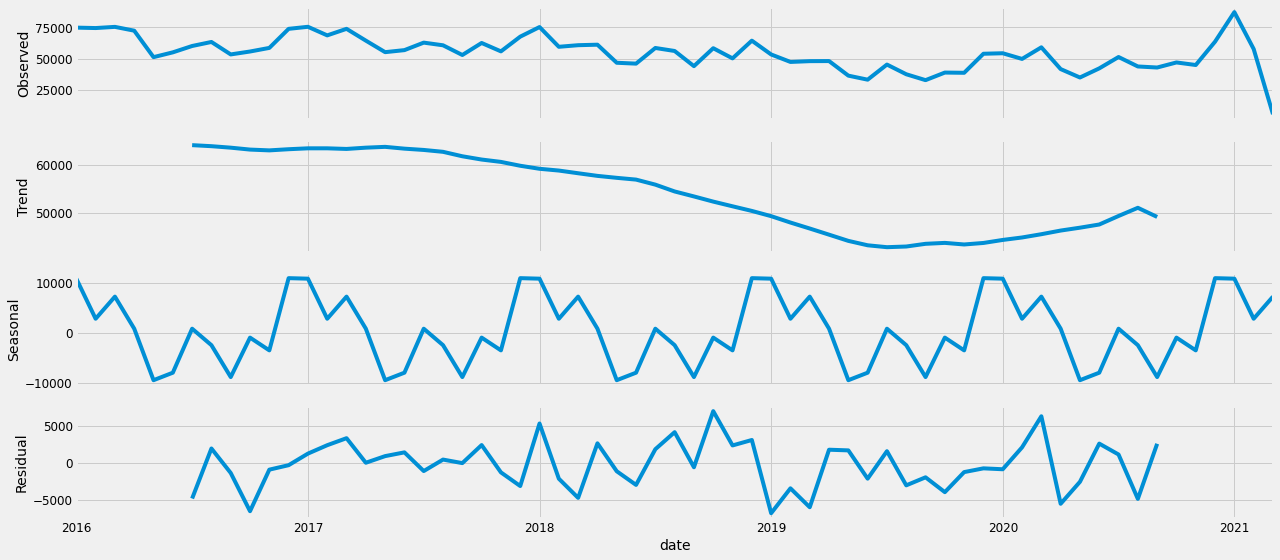

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1533.627324380712
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1195.7807616179505
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1088.7822818265554
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:829.8716762553851
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1103.6053833160092
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1085.2315523000846
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:860.0402737415657
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:841.2058976388892
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1465.430467799602
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1168.9543322874902
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1055.0354993848025
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:804.7660019624132
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1282.9996496673416
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1221.4141843135315
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:848.5937605466665
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.3331336484556
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1321.2422425657223
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1065.7301300628603


In [27]:
#@title get monthly arima forecast
def run_arima(df, kpi, freq):
    if freq == 'D' or freq == 'B':
        y = df.asfreq(freq)
    else:
        y = df.resample(freq).sum()
    # y =volume['volume'].asfreq(freq)
    y = y.dropna()
    
    y.plot(figsize=(15, 6))
    plt.show()
    
    from pylab import rcParams
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(y, model='additive')
    fig = decomposition.plot()
    plt.show()
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    # print('Examples of parameter combinations for Seasonal ARIMA...')
    # print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    # print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    # print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    # print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
    aic = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                aic.append((param, param_seasonal, results.aic))
            except:
                continue
    return y, min(aic, key=lambda x: x[2])

frequency = 'B' #@param ['B','D', 'MS', '6M', 'W', '2W', '3W', '6W', '12W', 'Q'] {type:"string"}
data = volume #@param ['aht', 'volume', 'handle_time'] {type:"raw"}
kpi = 'volume' #@param ['volume', 'handle_time', 'aht']

y, f = run_arima(data, kpi, frequency)

In [28]:
y,f

(date
 2016-01-01    74885.0
 2016-02-01    74540.0
 2016-03-01    75484.0
 2016-04-01    72428.0
 2016-05-01    51195.0
                ...   
 2020-11-01    44882.0
 2020-12-01    63621.0
 2021-01-01    87310.0
 2021-02-01    57742.0
 2021-03-01     5408.0
 Freq: MS, Name: volume, Length: 63, dtype: float64,
 ((0, 1, 1), (1, 1, 1, 12), 789.6211527075923))

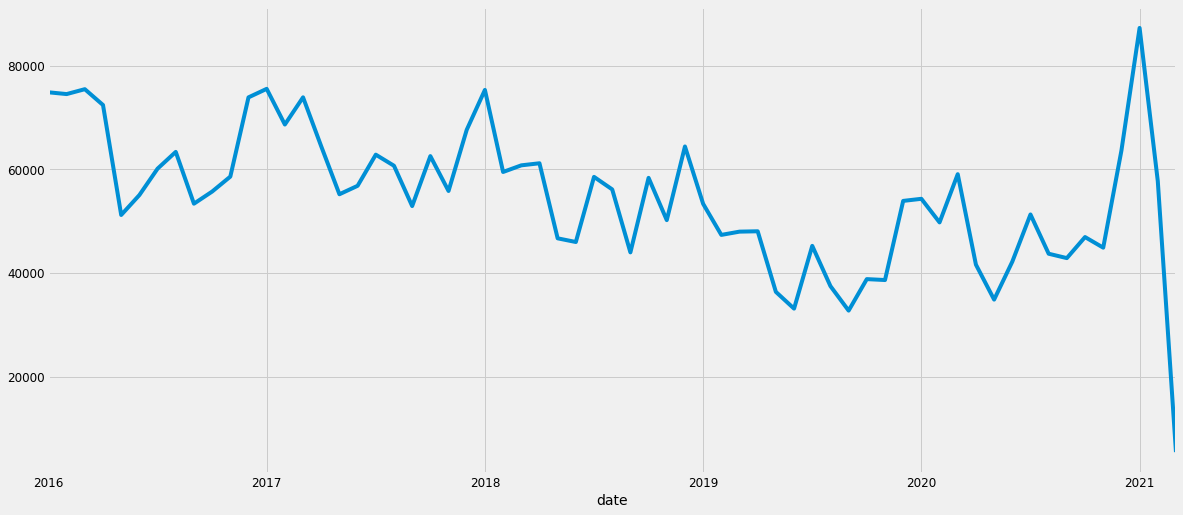

In [29]:
y.plot()

In [43]:
y_train = y['2016-01-01':'2020-05-01']

In [44]:
y_test = y['2020-06-01':]

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6649      0.252     -2.638      0.008      -1.159      -0.171
ar.S.L12      -0.7401      0.345     -2.143      0.032      -1.417      -0.063
ma.S.L12       0.0319      0.302      0.106      0.916      -0.559       0.623
sigma2      1.494e+08   2.95e-09   5.06e+16      0.000    1.49e+08    1.49e+08


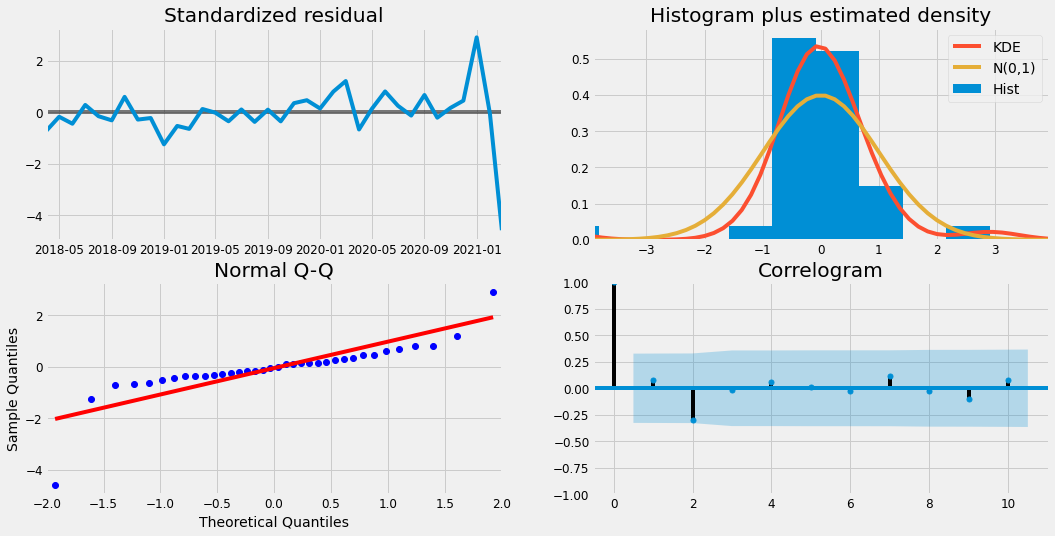

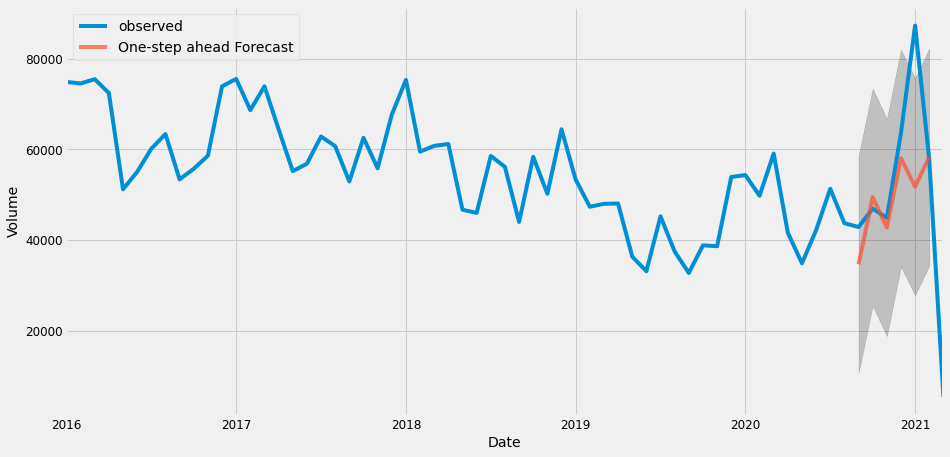

The Mean Squared Error of our forecasts is 228945404.61
The Root Mean Squared Error of our forecasts is 15130.94
The MAPE is 13.30234288449254


In [57]:
def run_model(y, end_train, end_test):
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(0, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    pred = results.get_prediction(start=pd.to_datetime(end_train), end=end_test, dynamic=False)
    pred_ci = pred.conf_int()
    ax = y['2014':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    plt.legend()
    plt.show()
    y_forecasted = pred.predicted_mean
    y_truth = y[end_train:]
    mse = ((y_forecasted - y_truth) ** 2).mean()
    mape = ((y_truth - y_forecasted)/y_truth).abs() *100
    mae = (y_truth - y_forecasted).abs()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
    res = pd.concat([y_truth, y_forecasted,mape,mae],1)

    res.columns = ['volume', 'forecast', 'mape', 'mae']
    print('The MAPE is {}'.format(res['mape'].mean()))
    return results, res

end_train = '2020-10-01' #@param {type:'date'}
end_test = '2021-02-01' #@param {type:'date'}
results, res = run_model(y, end_train, end_test)

In [53]:
res

,volume,forecast,mape,mae
date,,,,
2020-06-01,42178.0,32258.511558,23.518157,9919.488442
2020-07-01,51295.0,48172.570842,6.087200,3122.429158
2020-08-01,43711.0,45235.825768,3.488426,1524.825768
2020-09-01,42866.0,34630.286780,19.212694,8235.713220
2020-10-01,46929.0,49458.798111,5.390693,2529.798111
2020-11-01,44882.0,42753.541475,4.742343,2128.458525
2020-12-01,63621.0,58057.756430,8.744351,5563.243570
2021-01-01,87310.0,51762.488790,40.714135,35547.511210
2021-02-01,57742.0,58325.102919,1.009842,583.102919


In [32]:
res[:'2021-02']['mape'].mean()

12.120272750075253

In [18]:
res.to_csv('results_'+kpi+'.csv')

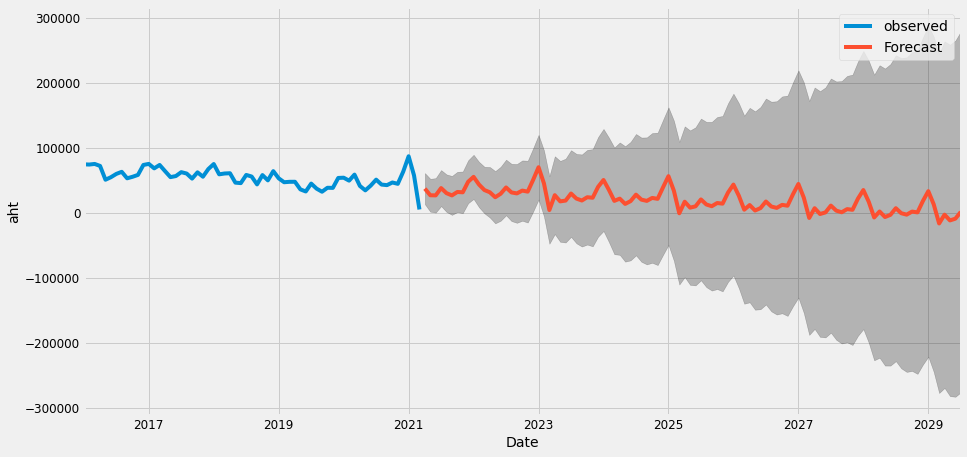

In [11]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('aht')
plt.legend()
plt.show()